In [1]:
#import important libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
#1. Load the dataset into python environment
#2. Make ‘PassengerId’ as the index column

In [4]:
data = pd.read_csv('titanic_dataset.csv', index_col= 'PassengerId' )

In [5]:
#3. Check the basic details of the dataset

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape

(891, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
data.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
#4. Fill in all the missing values present in all the columns in the dataset

In [13]:
# 'Age' and 'Embarked' has less number of missing value. We have to impute them using median and mode respectively.

In [14]:
for col in['Age']:data[col]=data[col].fillna(data[col].median())

In [15]:
Embarked_mode = data['Embarked'].mode()[0]

In [16]:
Embarked_mode

'S'

In [17]:
data['Embarked']= data['Embarked'].fillna(Embarked_mode)

In [18]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [19]:
#As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.

In [20]:
data= data.drop('Cabin', axis=1)

In [21]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
#5. Check and handle outliers in at least 3 columns in the dataset
# a) Survived 
# b) Age
# c) Fare
# d) Pclass 
# e) SibSp
# f) Parch

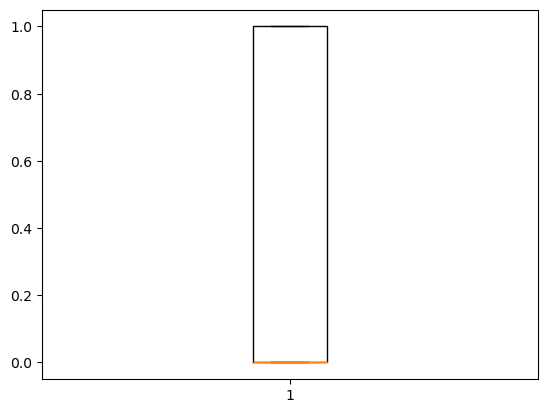

In [23]:
plt.boxplot(data['Survived'])
plt.show()

In [24]:
# No outliers are present

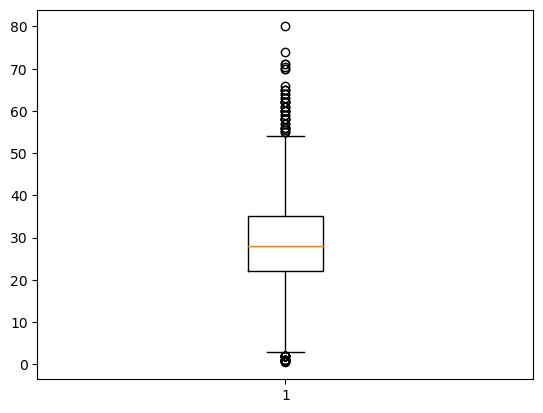

In [25]:
plt.boxplot(data['Age'])
plt.show()

In [26]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

In [27]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [28]:
IQR=Q3-Q1
print(Q3-Q1)

13.0


In [29]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [30]:
print(lower_limit)
print(upper_limit)

2.5
54.5


In [31]:
outlier=[]
for x in data['Age']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)

In [32]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [33]:
#removing outliers
index_out=data['Age']>upper_limit

In [34]:
data.loc[index_out].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [35]:
#droping outlier values
data.drop(data.loc[index_out].index,inplace=True)

In [36]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


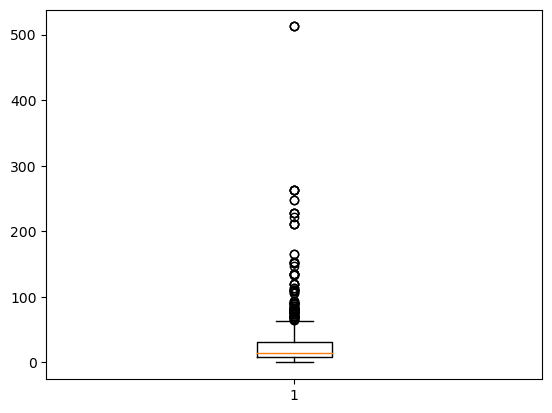

In [37]:
plt.boxplot(data['Fare'])
plt.show()

In [38]:
X1=np.percentile(data['Fare'],25,interpolation='midpoint')
X2=np.percentile(data['Fare'],50,interpolation='midpoint')
X3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [39]:
print(X1)
print(X2)
print(X3)

7.8958
14.1083
30.5


In [40]:
IQR_fare=X3-X1
print(X3-X1)

22.6042


In [41]:
upper_limit_fare=X3+1.5*IQR_fare
lower_limit_fare=X1-1.5*IQR_fare

In [42]:
print(lower_limit_fare)
print(upper_limit_fare)

-26.0105
64.4063


In [43]:
outlier_fare=[]
for i in data['Fare']:
  if((i>upper_limit_fare) or (i<lower_limit_fare)):
    outlier.append(i)

In [44]:
outlier_fare

[]

In [45]:
#removing outliers
index_out_fare=data['Fare']>upper_limit_fare

In [46]:
data.loc[index_out_fare].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=108)

In [47]:
#droping outlier values
data.drop(data.loc[index_out_fare].index,inplace=True)

In [48]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


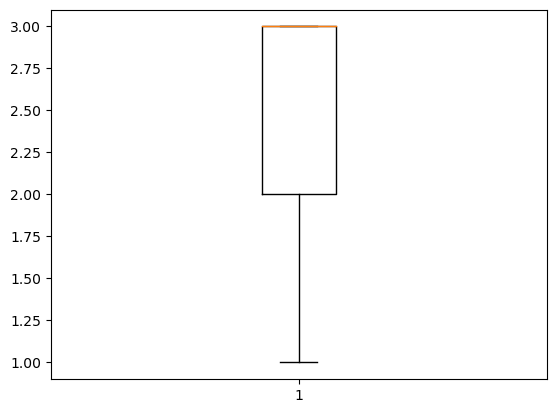

In [49]:
plt.boxplot(data['Pclass'])
plt.show()

In [50]:
# no outliers presnt in the column

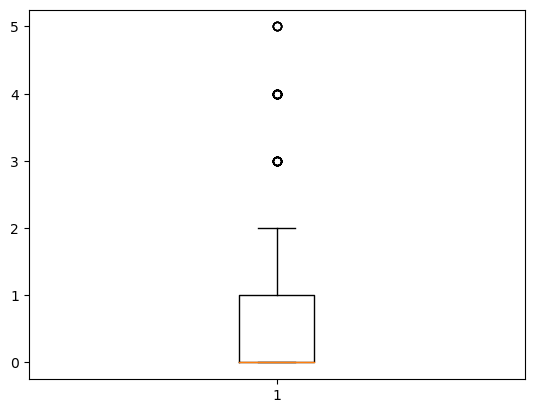

In [51]:
plt.boxplot(data['SibSp'])
plt.show()

In [52]:
Y1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Y2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Y3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [53]:
print(Y1)
print(Y2)
print(Y3)

0.0
0.0
1.0


In [54]:
IQR_sibsp=Y3-Y1
print(Y3-Y1)

1.0


In [55]:
upper_limit_sibsp=Y3+1.5*IQR_sibsp
lower_limit_sibsp=Y1-1.5*IQR_sibsp

In [56]:
print(lower_limit_sibsp)
print(upper_limit_sibsp)

-1.5
2.5


In [57]:
outlier_sibsp=[]
for y in data['SibSp']:
  if((y>upper_limit_sibsp) or (y<lower_limit_sibsp)):
    outlier.append(y)

In [58]:
outlier_sibsp

[]

In [59]:
#removing outliers
index_out_sibsp=data['SibSp']>upper_limit_sibsp

In [60]:
data.loc[index_out_sibsp].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [61]:
#droping outlier values
data.drop(data.loc[index_out_sibsp].index,inplace=True)

In [62]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


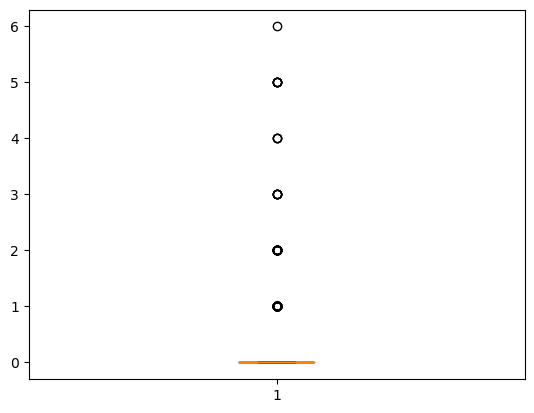

In [63]:
plt.boxplot(data['Parch'])
plt.show()

In [64]:
Z1=np.percentile(data['Parch'],25,interpolation='midpoint')
Z2=np.percentile(data['Parch'],50,interpolation='midpoint')
Z3=np.percentile(data['Parch'],75,interpolation='midpoint')

In [65]:
print(Z1)
print(Z2)
print(Z3)

0.0
0.0
0.0


In [66]:
IQR_pa=Z3-Z1
print(Z3-Z1)

0.0


In [67]:
upper_limit_pa=Z3+1.5*IQR_pa
lower_limit_pa=Z1-1.5*IQR_pa

In [68]:
print(lower_limit_pa)
print(upper_limit_pa)

0.0
0.0


In [69]:
outlier_pa=[]
for z in data['Parch']:
  if((z>upper_limit_pa) or (z<lower_limit_pa)):
    outlier.append(x)

In [70]:
outlier_pa

[]

In [71]:
#removing outliers
index_out_pa=data['Parch']>upper_limit_pa

In [72]:
data.loc[index_out_pa].index

Int64Index([  9,  11,  14,  26,  44,  59,  66,  79,  87,  94,
            ...
            849, 853, 854, 856, 859, 870, 872, 881, 886, 889],
           dtype='int64', name='PassengerId', length=128)

In [73]:
#droping outlier values
data.drop(data.loc[index_out_pa].index,inplace=True)

In [74]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S


In [75]:
data.shape

(577, 10)

In [76]:
#6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [77]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [78]:
data1 = data.drop(['Survived','Name','Sex','Ticket','Embarked'], axis=1)

In [79]:
data1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583


In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
minmax = MinMaxScaler(feature_range=(0,1))

In [82]:
df = minmax.fit_transform(data1)

In [83]:
type(df)

numpy.ndarray

In [84]:
data1.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [85]:
df= pd.DataFrame(df,columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [86]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,577.0,577.000000
mean,0.751300,0.495986,0.099653,0.0,0.243994
std,0.366954,0.174524,0.222517,0.0,0.206073
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.500000,0.387755,0.000000,0.0,0.127094
50%,1.000000,0.469388,0.000000,0.0,0.141602
75%,1.000000,0.561224,0.000000,0.0,0.259093
max,1.000000,1.000000,1.000000,0.0,1.000000
